In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("AcademicPerformance.csv") 

In [47]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,NaN,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,NaN,Father,10.0,7.0,0.0,30,15,Bad,Above-7,L
3,NaN,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25.0,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50.0,12.0,50,No,Bad,Above-7,M


In [48]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 gender                      10
NationalITy                  0
PlaceofBirth                 0
StageID                      0
GradeID                      0
SectionID                    6
Topic                        0
Semester                     9
Relation                     0
raisedhands                 10
VisITedResources             5
AnnouncementsView            4
Discussion                   0
ParentAnsweringSurvey        0
ParentschoolSatisfaction     0
StudentAbsenceDays           0
Class                        0
dtype: int64


In [50]:
df.fillna("Semester", inplace=True)


In [51]:
df.fillna(df.mean(numeric_only=True), inplace=True)


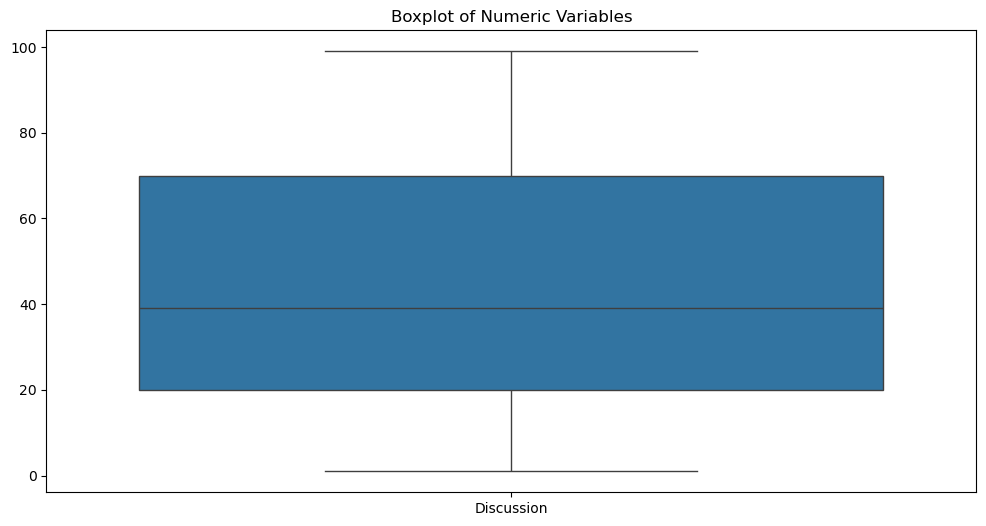

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplot of Numeric Variables")
plt.show()


In [54]:
Q1 = df.select_dtypes(include=np.number).quantile(0.25)
Q3 = df.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1

In [55]:
df_cleaned = df[~((df.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) |
                  (df.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))).any(axis=1)]

In [56]:
numeric_cols = df.select_dtypes(include=np.number).columns
df_cleaned = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                  (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [57]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [58]:
print(df_cleaned.shape)  # See how many rows were retained
print(df_cleaned.head())  # Verify changes


(480, 17)
    gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0        M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1        M          KW       KuwaIT  lowerlevel    G-04   Unknown    IT   
2        M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3  Unknown          KW       KuwaIT  lowerlevel    G-04         A    IT   
4        M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation raisedhands VisITedResources AnnouncementsView  \
0        F   Father        15.0             16.0               2.0   
1        F   Father        20.0             20.0               3.0   
2  Unknown   Father        10.0              7.0               0.0   
3        F   Father        30.0             25.0               5.0   
4        F   Father        40.0             50.0              12.0   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                   

In [61]:
df_cleaned['raisedhands'] = pd.to_numeric(df_cleaned['raisedhands'], errors='coerce')
df_cleaned["raisedhands_log"] = np.log1p(df_cleaned["raisedhands"])


In [62]:
df_cleaned = df_cleaned[df_cleaned['raisedhands'] >= 0]  # Remove negative values
df_cleaned["raisedhands_log"] = np.log1p(df_cleaned["raisedhands"])


In [63]:
print(df_cleaned['raisedhands'].head())


0    15.0
1    20.0
2    10.0
3    30.0
4    40.0
Name: raisedhands, dtype: float64


In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cleaned["Discussion_Scaled"] = scaler.fit_transform(df_cleaned[["Discussion"]])


In [65]:
df_cleaned.to_csv("AcademicPerformance_Cleaned.csv", index=False)
